Analysis By:
Yash Baleri 
Aarsh Ghewde
Deep Shah

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt


In [2]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def sentiment_polarity(text):
    # Check if the text is a string
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        # Return None or a default value if the text is not a string
        return None

In [8]:
# Load the review CSV files
df_product1 = pd.read_csv('amazon_reviews_product_1.csv') # Beats Studio Buds
df_product2 = pd.read_csv('amazon_reviews_product_2.csv') # Apple Airpods

# Extracting numerical values from the 'Rating' column
df_product1['Rating'] = df_product1['Rating'].str.extract('(\d+\.\d+)').astype(float)
df_product2['Rating'] = df_product2['Rating'].str.extract('(\d+\.\d+)').astype(float)

# Applying sentiment analysis on the Review column
df_product1['Sentiment'] = df_product1['Review'].apply(sentiment_polarity)
df_product2['Sentiment'] = df_product2['Review'].apply(sentiment_polarity)

# Calculating average ratings and sentiments
avg_rating_product1 = df_product1['Rating'].mean()
avg_rating_product2 = df_product2['Rating'].mean()
avg_sentiment_product1 = df_product1['Sentiment'].mean()
avg_sentiment_product2 = df_product2['Sentiment'].mean()

# Print average ratings and sentiments
print(f"Average Rating for Product 1 (Beats): {avg_rating_product1}")
print(f"Average Rating for Product 2 (Apple): {avg_rating_product2}")
print(f"Average Sentiment for Product 1 (Beats): {avg_sentiment_product1}")
print(f"Average Sentiment for Product 2 (Apple): {avg_sentiment_product2}")

Average Rating for Product 1 (Beats): 2.9791666666666665
Average Rating for Product 2 (Apple): 3.293906810035842
Average Sentiment for Product 1 (Beats): 0.1879171989975357
Average Sentiment for Product 2 (Apple): 0.17328788849652044


Word Cloud for Product 1 (Excluding name of the product):


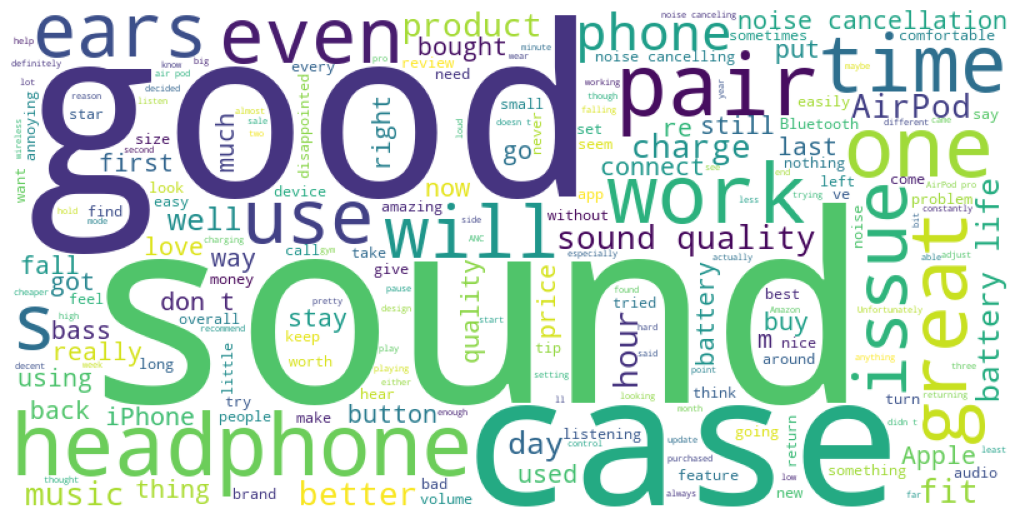

Word Cloud for Product 2 (Excluding name of the product):


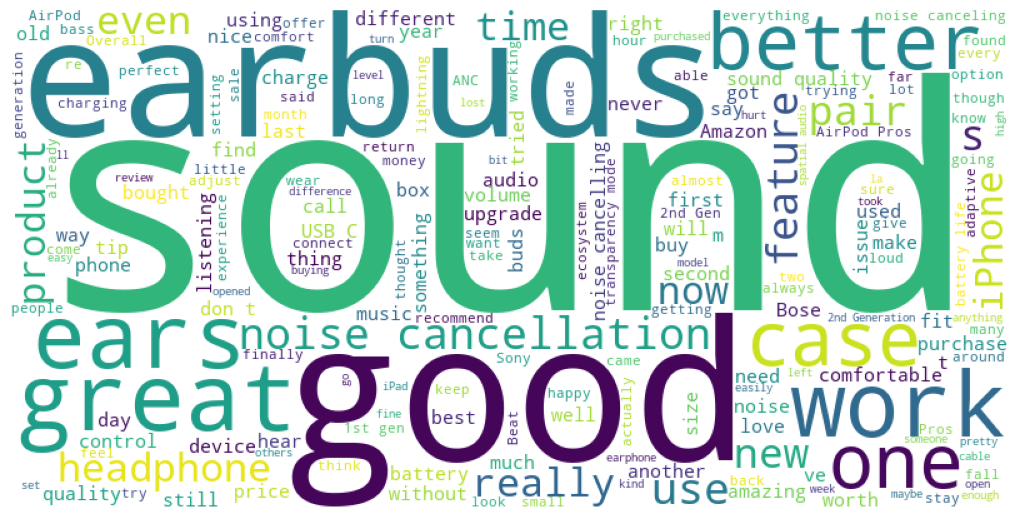

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Function to create a word cloud excluding specific words
def create_wordcloud(text, exclusion_list):
    stopwords = set(STOPWORDS)
    stopwords.update(exclusion_list)  # Adding custom stopwords

    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)
    plt.figure(figsize=(10, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


combined_reviews_product1 = " ".join(str(review) for review in df_product1.Review)
combined_reviews_product2 = " ".join(str(review) for review in df_product2.Review)



# Words to be excluded from the word clouds
exclusion_list_product1 = ["Beats", "Studio", "beats", "studio","buds", "earbud", "ear","bud","earbuds"]
exclusion_list_product2 = ["AirPods","Pro","Apple","airpods", "air", "pods","Air", "Pods", "earbud", "ear","bud"]  


# Generating and displaying word clouds for each product
print("Word Cloud for Product 1 (Excluding name of the product):")
create_wordcloud(combined_reviews_product1, exclusion_list_product1)

print("Word Cloud for Product 2 (Excluding name of the product):")
create_wordcloud(combined_reviews_product2, exclusion_list_product2)

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Function to clean and tokenize text


def clean_and_tokenize(text):
    if isinstance(text, str):  # Check if the input is a string
        lower_text = text.lower()
        # Removing punctuation
        clean_text = lower_text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(clean_text)
        # Removing stopwords and short words
        tokens = [word for word in tokens if word not in stopwords.words('english') and len(word) > 2]
        return tokens
    else:
        return []  # Return an empty list for non-string inputs


# Tokenizing the review texts
tokens_product1 = [word for review in df_product1['Review'] for word in clean_and_tokenize(review)]
tokens_product2 = [word for review in df_product2['Review'] for word in clean_and_tokenize(review)]

# Counting the frequency of words
word_freq_product1 = Counter(tokens_product1)
word_freq_product2 = Counter(tokens_product2)

# Getting the most common words
common_words_product1 = word_freq_product1.most_common(25)
common_words_product2 = word_freq_product2.most_common(25)

common_words_product1, common_words_product2


[nltk_data] Downloading package punkt to C:\Users\Yash
[nltk_data]     Baleri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Yash
[nltk_data]     Baleri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


([('sound', 356),
  ('ear', 307),
  ('buds', 278),
  ('earbuds', 255),
  ('noise', 254),
  ('good', 235),
  ('like', 209),
  ('beats', 202),
  ('quality', 194),
  ('case', 189),
  ('battery', 174),
  ('pair', 174),
  ('get', 168),
  ('great', 164),
  ('headphones', 161),
  ('would', 156),
  ('even', 153),
  ('airpods', 139),
  ('ears', 137),
  ('one', 135),
  ('better', 133),
  ('phone', 131),
  ('also', 126),
  ('use', 125),
  ('time', 125)],
 [('airpods', 197),
  ('apple', 147),
  ('noise', 143),
  ('sound', 133),
  ('pro', 92),
  ('earbuds', 91),
  ('ear', 89),
  ('quality', 86),
  ('like', 86),
  ('good', 86),
  ('great', 79),
  ('better', 76),
  ('ears', 73),
  ('case', 64),
  ('audio', 63),
  ('cancellation', 61),
  ('work', 57),
  ('use', 57),
  ('new', 54),
  ('even', 53),
  ('really', 53),
  ('gen', 53),
  ('buds', 52),
  ('get', 50),
  ('headphones', 50)])

## Comparative Analysis of Customer Reviews: Beats Studio Earbuds vs. Apple AirPods Pro 2

### Introduction

This report delves into the customer reviews of two competitive audio products: Beats Studio Earbuds and Apple AirPods Pro 2. Using sentiment analysis, word frequency, and visual representation through word clouds, we aim to highlight the key distinctions in customer feedback and product perception.

### Methodology

The analysis included calculating average ratings and sentiments derived from customer reviews. Word clouds were generated, excluding specific product names to focus on other aspects of the reviews. The top 25 most frequent words were identified to understand prevalent themes in customer feedback.##

### Quantitative Findings

#### Average Ratings:

Beats Studio Earbuds: 2.98
Apple AirPods Pro 2: 3.29

#### Average Sentiment:

Beats Studio Earbuds: 0.188
Apple AirPods Pro 2: 0.173




Although the Beats Studio Earbuds have a slightly higher sentiment score, the AirPods Pro 2 lead with a higher average rating, suggesting a more favorable customer reception overall.

### Qualitative Analysis Based on Word Clouds and Frequency

#### Beats Studio Earbuds:

Commonly associated words include "sound," "noise," "good," "quality," and "battery."
Customers frequently discuss sound quality and noise-related features, indicating these are significant considerations.
The word "case" and "battery" suggest a focus on the charging case and battery life.
Words like "great," "better," and "phone" reflect comparative language and considerations of usage with smartphones.

#### Apple AirPods Pro 2:

The word cloud emphasizes "noise," "sound," "quality," "great," and "better."
"Cancellation" and "work" appear prominently, possibly highlighting the noise cancellation feature and their functionality during various activities.
"Ears" and "fit" suggest that comfort and fit are important to customers.
The presence of "new" and "gen" indicates discussions around the latest generation and features.

#### Comparative Insights

Both products are highly discussed in the context of sound quality and noise management features.
Beats Studio Earbuds reviews often mention "battery" and "case," which might reflect concerns or appreciation regarding the product's charging capabilities.
AirPods Pro 2 reviews include words like "apple" and "pro" more frequently, potentially indicating a strong brand association and expectations of professional quality.
The sentiment analysis shows a nuanced view, with Beats slightly leading in sentiment despite lower ratings, suggesting that while users have issues with the product, their overall feelings may still be positive.

### Conclusion

The data suggests that while users find value in the sound quality and noise cancellation features of both products, the AirPods Pro 2 holds a slight edge in customer satisfaction as reflected in the ratings. Brand association for Apple appears to play a role in customer expectations. For Beats, the physical aspects like the charging case and battery life are crucial to user experience.

Both products have their strengths as perceived by customers, with Beats Studio Earbuds being appreciated for certain functionalities, whereas Apple AirPods Pro 2 stands out in brand association and advancements in features.